### Intro to Linear Combinations, Independence, Change of Basis & PCA  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dbp = np.array([78,80,81,82,84,86])
sbp = np.array([126,128,127,130,130,132])
health_index = np.array([0.6,0.8,0.7,0.9,0.94,0.98])
df = pd.DataFrame({"Diastolic BP":dbp, "Systolic BP":sbp, "Health Index": health_index})
df.head(10)

,Diastolic BP,Systolic BP,Health Index
0,78,126,0.60
1,80,128,0.80
2,81,127,0.70
3,82,130,0.90
4,84,130,0.94
5,86,132,0.98


In [3]:
df_features = df[["Diastolic BP", "Systolic BP"]]
df_features

,Diastolic BP,Systolic BP
0,78,126
1,80,128
2,81,127
3,82,130
4,84,130
5,86,132


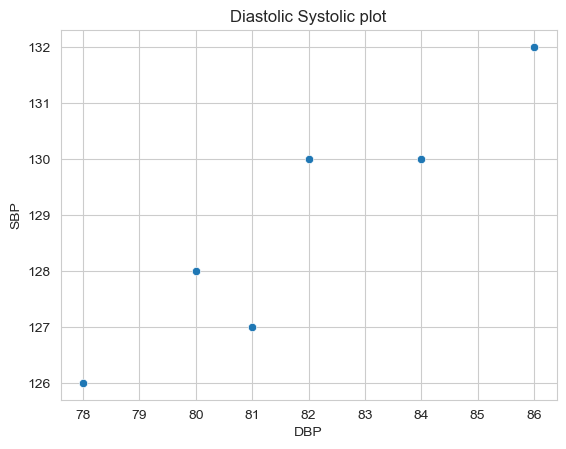

In [4]:
sns.set_style(style='whitegrid')

sp = sns.scatterplot(x=df["Diastolic BP"], y=df["Systolic BP"])
sp.set(xlabel ="DBP", ylabel = "SBP", title ='Diastolic Systolic plot')

plt.show()

**Activity: Calculate the variance of DBP and SBP**   

In [5]:
df_features.var()

Diastolic BP    8.166667
Systolic BP     4.966667
dtype: float64

**Activity: Create a synthetic feature as linear combination of DBP and SBP**

1. Use beta1 = 0.8, beta2=0.6

In [6]:
beta1=0.8
beta2=0.6
syn_feature1=beta1*df_features["Diastolic BP"] + beta2*df_features["Systolic BP"]
syn_feature1

0    138.0
1    140.8
2    141.0
3    143.6
4    145.2
5    148.0
dtype: float64

**Activity: Write the above linear combination as Matrix vector product** 

In [7]:
beta=np.array([beta1,beta2])
X=df_features.to_numpy()
np.matmul(X,beta)

array([138. , 140.8, 141. , 143.6, 145.2, 148. ])

**Activity: Create a new dataframe with synthetic feature column added and calculate variance of each column**

In [9]:
dbp = np.array([78,80,81,82,84,86])
sbp = np.array([126,128,127,130,130,132])
df_features= pd.DataFrame({"Diastolic BP":dbp, "Systolic BP":sbp})
df_features["Synthetic Feature1"]=beta1*df_features["Diastolic BP"]+beta2*df_features["Systolic BP"]
df_features.head()

,Diastolic BP,Systolic BP,Synthetic Feature1
0,78,126,138.0
1,80,128,140.8
2,81,127,141.0
3,82,130,143.6
4,84,130,145.2


In [10]:
df_features.var()

Diastolic BP           8.166667
Systolic BP            4.966667
Synthetic Feature1    12.742667
dtype: float64

**Activity: How much of total variance is explained by synthetic feature**

Code this

In [11]:
explained_var=df_features["Synthetic Feature1"].var()
total_var=df_features["Diastolic BP"].var()+df_features["Systolic BP"].var()
explained_var/total_var*100

97.0253807106598

In [12]:
type(df_features["Diastolic BP"])

pandas.core.series.Series

**Activity: Add new synthetic features with different betas**

1. Create a new dataframe with features
2. Add synthetic feature as before (beta1=0.8, beta=0.6)
3. Add synthetic features for different betas
4. beta1=0.6, 0.98, 0.2, beta2=0.8, 0.2, 0.98 for DBP and SBP resepctively

In [13]:
dbp = np.array([78,80,81,82,84,86])
sbp = np.array([126,128,127,130,130,132])
df_features= pd.DataFrame({"Diastolic BP":dbp, "Systolic BP":sbp})
df_features.head()

,Diastolic BP,Systolic BP
0,78,126
1,80,128
2,81,127
3,82,130
4,84,130


In [14]:
cov_mat = df_features.cov()

# Watch out. If you are using numpy for calculating covariance matrix,
# then you have to first take a transpose data matrix
# It is pretty wierd. But it is what it is. :-(
# cov_mat = np.cov(df_features.to_numpy().T)

cov_mat

,Diastolic BP,Systolic BP
Diastolic BP,8.166667,5.966667
Systolic BP,5.966667,4.966667


cov_mat
$$
\begin{bmatrix}
\sigma_1^2 & xyz \\
xyz & \sigma_2^2
\end{bmatrix}
$$

correl_mat
$$
\begin{bmatrix}
\sigma_1^2/\sigma_1^2 & xyz/\sigma_1\sigma_2 \\
xyz/\sigma_1\sigma_2 & \sigma_2^2/\sigma_2^2
\end{bmatrix}
$$


In [15]:
correl_mat = df_features.corr()
correl_mat

,Diastolic BP,Systolic BP
Diastolic BP,1.000000,0.936865
Systolic BP,0.936865,1.000000


In [16]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [17]:
eigen_vals

array([12.74413468,  0.38919865])

In [18]:
eigen_vecs

array([[ 0.79341219, -0.60868473],
       [ 0.60868473,  0.79341219]])

In [19]:
eigen_vecs[0] #this is not eigen vec 1

array([ 0.79341219, -0.60868473])

In [20]:
eigen_vecs[:, 0] # this is eigen vec 1

array([0.79341219, 0.60868473])

In [21]:
X = df_features.to_numpy()
v1 = eigen_vecs[:, 0]
v2 = eigen_vecs[:, 1]

**Matrix-Vector multiplication as vector of projections**

In [22]:
# Xv1 gives PC1
# It gives the vector formed whose individual entries are 
# projection of individual records onto the direction of v1 
PC1 = np.matmul(X, v1)
PC1

array([138.58042679, 141.38462062, 141.56934808, 144.18881446,
       145.77563883, 148.57983267])

In [23]:
# Xv2 gives PC2
# It gives the vector formed whose individual entries are 
# projection of individual records onto the direction of v2
PC2 = np.matmul(X, v2)
PC2

array([52.49252624, 52.86198115, 51.45988423, 53.23143606, 52.01406659,
       52.3835215 ])

**Viewing Vx1 (Multiplying a record vector with Eigen matrix) as change of basis**

In [24]:
# Make Eigen Matrix
V = np.array([v1, v2])
V

array([[ 0.79341219,  0.60868473],
       [-0.60868473,  0.79341219]])

In [25]:
val_in_std_basis = X[0,:]
print(f"val_in_std_basis= {val_in_std_basis}")

val_in_eigen_basis = np.matmul(V, val_in_std_basis)
print(f"val_in_eigen_basis= {val_in_eigen_basis}")

val_in_std_basis= [ 78 126]
val_in_eigen_basis= [138.58042679  52.49252624]


**Summary**

Matrix Vector product can be viewed in 4-5 ways from a ML and data science perspective. 
1. Projection of the dataset record onto a vector
2. Linear combination of features
3. Change of basis: What are the new coordinates of a record vector when viewed from a new basis (This could be Eigen basis or any other basis)
4. Matrix is a linear transformation applied to vector (And a special case is Eigen vector transformation)

There are 2-3+ more ways of looking at it (in future)
1. Row picture
2. Reduced dimension linear combination of archetype
3. Spectral addition over low rank matrices

**Dot product of vectors**
$$
    a^Tb = \|a\| \|b\| cos\theta
$$

In [26]:
# Dot product of standard unit vectors e1 and e2
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
np.dot(e1, e2)

0

In [27]:
# Dot products of eigen vectors
np.dot(v1, v2)

0.0